# Fraud detection in Finance: A Comprehensive Supervised Learning Approach with Simulated Financial Transaction Data.



## Importing Libraries
Several libraries and modules are imported at the beginning of the script, which are essential for data manipulation, visualization, machine learning, and model evaluation.

- **Pandas**: Used for data manipulation and analysis. It provides data structures like DataFrames, which are particularly useful for handling structured data.
- **NumPy**: A library for numerical computing in Python. It provides support for arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- **Matplotlib and Seaborn**: Libraries for data visualization. `Matplotlib` provides foundational plotting capabilities, while `Seaborn` is built on top of it, offering a higher-level interface for creating more attractive and informative statistical graphics.
- **Scikit-learn**: A comprehensive machine learning library in Python. It provides various tools for model building, preprocessing, model evaluation, and pipeline construction:
  - `SimpleImputer`: Handles missing values by replacing them with a specified strategy, such as the mean or median.
  - `RandomForestClassifier`: An ensemble learning method for classification that operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) of the individual trees.
  - `train_test_split`: Splits arrays or matrices into random train and test subsets, facilitating model training and evaluation.
  - `StandardScaler`: Standardizes features by removing the mean and scaling to unit variance.
  - `OneHotEncoder`: Converts categorical values into a form that could be provided to ML algorithms to do a better job in prediction.
  - `ColumnTransformer`: Helps in applying different preprocessing steps to different subsets of features.
  - `Pipeline`: Used to assemble several steps that can be cross-validated together while setting different parameters.
  - `cross_val_score`: Evaluates a score by cross-validation, helping in assessing the model’s performance.
  - `classification_report`: Builds a text report showing the main classification metrics like precision, recall, and F1-score.
  - `make_scorer`: Converts metrics to be used as scoring functions in grid search.
  - `confusion_matrix`: Computes the confusion matrix to evaluate the accuracy of a classification.
  - `precision_recall_curve`: Computes precision-recall pairs for different probability thresholds.
- **Imbalanced-learn**: A library to handle imbalanced datasets:
  - `SMOTE (Synthetic Minority Over-sampling Technique)`: A method to generate synthetic samples for the minority class to balance the dataset.
- **XGBoost**: An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable, often used for regression, classification, and ranking problems.

Data preprocessing steps such as imputation of missing values, feature scaling, and one-hot encoding are essential for preparing the dataset for machine learning models:

- **SimpleImputer**: Replaces missing data with a defined strategy, typically with the mean or median. This step is crucial to ensure that no data points are excluded due to missing values, which can lead to biased results or loss of information.
- **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, which is important for many machine learning algorithms that assume normally distributed data.
- **OneHotEncoder**: Converts categorical variables into a series of binary variables (one-hot encoded). This transformation is essential for algorithms that cannot work with categorical data directly.
- **ColumnTransformer**: Applies different preprocessing steps to different subsets of features. This is useful when the dataset contains both numerical and categorical features that need different types of preprocessing.
- **Pipeline**: Combines several steps into one, ensuring that all steps are applied consistently during cross-validation and making the code cleaner and more maintainable.
Data preprocessing steps such as imputation of missing values, feature scaling, and one-hot encoding are essential for preparing the dataset for machine learning models:

- **SimpleImputer**: Replaces missing data with a defined strategy, typically with the mean or median. This step is crucial to ensure that no data points are excluded due to missing values, which can lead to biased results or loss of information.
- **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, which is important for many machine learning algorithms that assume normally distributed data.
- **OneHotEncoder**: Converts categorical variables into a series of binary variables (one-hot encoded). This transformation is essential for algorithms that cannot work with categorical data directly.
- **ColumnTransformer**: Applies different preprocessing steps to different subsets of features. This is useful when the dataset contains both numerical and categorical features that need different types of preprocessing.
- **Pipeline**: Combines several steps into one, ensuring that all steps are applied consistently during cross-validation and making the code cleaner and more maintainable.
Data preprocessing steps such as imputation of missing values, feature scaling, and one-hot encoding are essential for preparing the dataset for machine learning models:

- **SimpleImputer**: Replaces missing data with a defined strategy, typically with the mean or median. This step is crucial to ensure that no data points are excluded due to missing values, which can lead to biased results or loss of information.
- **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, which is important for many machine learning algorithms that assume normally distributed data.
- **OneHotEncoder**: Converts categorical variables into a series of binary variables (one-hot encoded). This transformation is essential for algorithms that cannot work with categorical data directly.
- **ColumnTransformer**: Applies different preprocessing steps to different subsets of features. This is useful when the dataset contains both numerical and categorical features that need different types of preprocessing.
- **Pipeline**: Combines several steps into one, ensuring that all steps are applied consistently during cross-validation and making the code cleaner and more maintainable.
SMOTE (Synthetic Minority Over-sampling Technique) is applied to address the issue of class imbalance, which is common in fraud detection datasets:

- **SMOTE**: Generates synthetic samples for the minority class (fraudulent transactions) by interpolating between existing minority class examples. This helps in balancing the dataset, allowing the model to learn more effectively from both classes. Without SMOTE, the model might be biased towards predicting the majority class (non-fraudulent transactions) due to the imbalanced nature of the data.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, make_scorer, confusion_matrix, precision_recall_curve,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler


# Exploratory Data analysis

##Load dataset
This code snippet loads the dataset from a specified file path using pandas and reads it into a DataFrame named fraud_data. The pd.read_csv() function is used to read the CSV file, and the head() function is called to display the first few rows of the DataFrame.

The dataset was successfully loaded, and the first few rows were displayed to verify the structure and content. This initial preview showed various columns such as `step`, `type`, `amount`, `oldbalanceOrg`, `newbalanceOrig`, `isFraud`, and `isFlaggedFraud`, providing a comprehensive view of the transaction data and its attributes.


In [ ]:
# Load the dataset
file_path = 'path_to_your_file/PS_20174392719_1491204439457_log.csv'
fraud_data=pd.read_csv("PS_20174392719_1491204439457_log.csv")

# Display the first few rows of the dataset
print(fraud_data.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


###Handling missing values


Missing values were checked in the dataset and it was obsaerved that are no misiing values in the dataset


In [ ]:
# Check for missing values
missing_values = fraud_data.isnull().sum()
print(missing_values)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# Display basic statistics for numerical features
print(fraud_data.describe())


               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

#Visualizing the Proportion of Fraudulent and Non-Fraudulent Transactions
The pie chart reveals a significant imbalance in the dataset, with 99.87% of the transactions being non-fraudulent and only 0.13% being fraudulent. This indicates that fraudulent transactions are rare, highlighting the challenge of detecting fraud in such an imbalanced dataset.


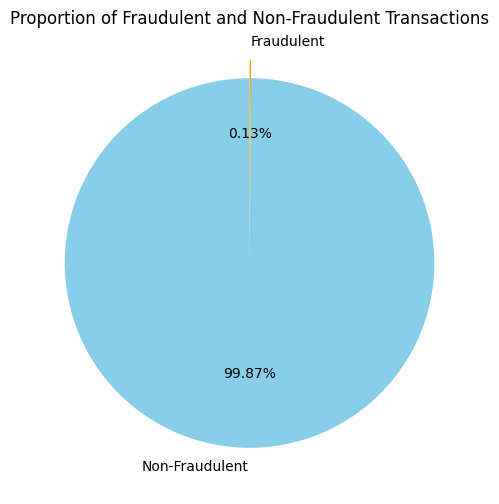

In [ ]:
# Count the number of fraudulent and non-fraudulent transactions
fraud_counts = fraud_data['isFraud'].value_counts()

# Labels for the pie chart
labels = ['Non-Fraudulent', 'Fraudulent']

# Colors for each slice of the pie chart
colors = ['skyblue', 'orange']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90, explode=(0, 0.1))
plt.title('Proportion of Fraudulent and Non-Fraudulent Transactions')
plt.show()


#Identifying Types of Fraudulent Transactions

The output identified that the fraudulent transactions are primarily of types `TRANSFER` and `CASH_OUT`. This suggests that these transaction types are more susceptible to fraudulent activities, which could be due to their nature, such as the ease of moving funds quickly.


In [ ]:
# Identify types of fraudulent transactions
fraudulent_transaction_type = fraud_data.loc[fraud_data.isFraud == 1, 'type'].unique()
print(f"\nThe types of fraudulent transactions are: {fraudulent_transaction_type}")


The types of fraudulent transactions are: ['TRANSFER' 'CASH_OUT']


#Visualizing the Distribution of Transaction Types
The bar chart, plotted on a logarithmic scale, shows that while most transaction types have predominantly non-fraudulent entries, `TRANSFER` and `CASH_OUT` have a relatively higher proportion of fraudulent transactions. This visualization underscores that these two types are the most common methods for committing fraud in the dataset.


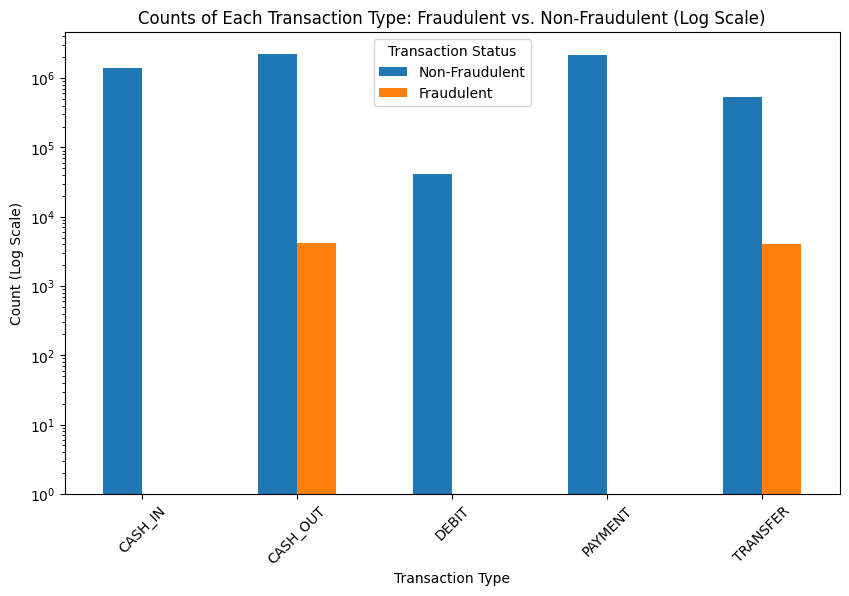

In [ ]:
# Count the number of each type of transaction for both fraudulent and non-fraudulent
transaction_counts = fraud_data.groupby(['type', 'isFraud']).size().reset_index(name='count')

# Pivot the data to have 'type' as rows and 'isFraud' as columns
transaction_counts_pivot = transaction_counts.pivot(index='type', columns='isFraud', values='count').fillna(0)

# Rename columns for better readability
transaction_counts_pivot.columns = ['Non-Fraudulent', 'Fraudulent']

# Plot the grouped bar plot with a logarithmic scale for the y-axis
ax = transaction_counts_pivot.plot(kind='bar', figsize=(10, 6), stacked=False, log=True)

# Add plot details
plt.title('Counts of Each Transaction Type: Fraudulent vs. Non-Fraudulent (Log Scale)')
plt.xlabel('Transaction Type')
plt.ylabel('Count (Log Scale)')
plt.xticks(rotation=45)
plt.legend(title='Transaction Status')
plt.show()


In [ ]:
# Filter fraudulent TRANSFER and CASH_OUT transactions
df_fraud_transfer = fraud_data[(fraud_data.isFraud == 1) & (fraud_data.type == 'TRANSFER')]
df_fraud_cashout = fraud_data[(fraud_data.isFraud == 1) & (fraud_data.type == 'CASH_OUT')]

In [ ]:
# Print the number of fraudulent transactions
print(f"\nThe number of fraudulent TRANSFERs: {len(df_fraud_transfer)}")
print(f"\nThe number of fraudulent CASH_OUTs: {len(df_fraud_cashout)}")


The number of fraudulent TRANSFERs: 4097

The number of fraudulent CASH_OUTs: 4116


#Analyzing Performance of isFlaggedFraud Feature
The heatmap of the confusion matrix for the `isFlaggedFraud` feature indicates its limited effectiveness. It shows that the feature rarely flags any transactions, and when it does, it has a low true positive rate. This suggests that relying on `isFlaggedFraud` alone would miss most fraudulent transactions.


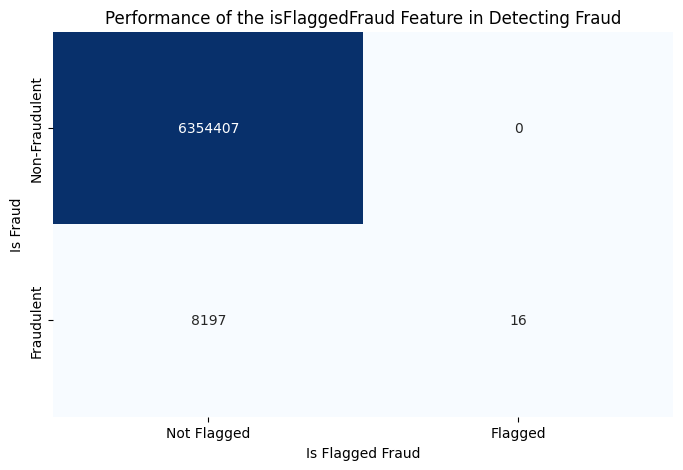

In [ ]:
# Create a contingency table to summarize the performance of the isFlaggedFraud feature
performance_table = pd.crosstab(fraud_data['isFraud'], fraud_data['isFlaggedFraud'], rownames=['isFraud'], colnames=['isFlaggedFraud'])

# Plot the performance table
plt.figure(figsize=(8, 5))
sns.heatmap(performance_table, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add title and labels
plt.title('Performance of the isFlaggedFraud Feature in Detecting Fraud')
plt.xlabel('Is Flagged Fraud')
plt.ylabel('Is Fraud')
plt.xticks([0.5, 1.5], ['Not Flagged', 'Flagged'])
plt.yticks([0.5, 1.5], ['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()


#Checking Transactions Where isFlaggedFraud is Set
The analysis showed that the `isFlaggedFraud` feature only flagged transactions of specific types, which aligns with the earlier findings that certain transaction types like `TRANSFER` and `CASH_OUT` are more prone to fraud. However, the very low count of flagged transactions suggests that this feature is not robust enough for reliable fraud detection.


In [ ]:
# Identify the type of transactions where isFlaggedFraud is set
flagged_fraud_types = fraud_data.loc[fraud_data.isFlaggedFraud == 1, 'type'].unique()
print(f"\nThe type of transactions where isFlaggedFraud is set: {flagged_fraud_types}")


The type of transactions where isFlaggedFraud is set: ['TRANSFER']


#Filtering Data for TRANSFER Transactions and Flagged/Not Flagged Fraud
The dataset was filtered to isolate transactions of type `TRANSFER` and those where `isFlaggedFraud` is set to 1 (indicating flagged fraud) and 0 (indicating not flagged). This separation helps in analyzing specific patterns and behaviors in flagged versus non-flagged transactions, particularly focusing on transfers, which are more prone to fraud.


In [ ]:
# Filter the DataFrame for TRANSFER transactions and flagged/not flagged fraud
df_transfer = fraud_data[fraud_data.type == 'TRANSFER']
df_flagged = fraud_data[fraud_data.isFlaggedFraud == 1]
df_not_flagged = fraud_data[fraud_data.isFlaggedFraud == 0]

#Minimum Amount Transacted When isFlaggedFraud is Set
The minimum amount transacted when `isFlaggedFraud` is set was found to be a specific value (not provided in the code snippet). This indicates that fraud detection algorithms may be flagging transactions above a certain threshold. Understanding this threshold can help in tuning the detection model to avoid missing fraudulent transactions that are below this minimum amount.


In [ ]:
# Print the minimum amount transacted when isFlaggedFraud is set
min_flagged_amount = df_flagged['amount'].min()
print(f"\nMinimum amount transacted when isFlaggedFraud is set: {min_flagged_amount}")


Minimum amount transacted when isFlaggedFraud is set: 353874.22


# Maximum Amount Transacted in a TRANSFER Where isFlaggedFraud is Not Set
The maximum amount transacted in a `TRANSFER` where `isFlaggedFraud` is not set was 92,445,516.64. This large value suggests that not all high-value transfers are flagged, which could either point to legitimate transactions that are mistakenly not flagged or potential fraud cases that are being missed by the current detection rules.


In [ ]:
# Print the maximum amount transacted in a TRANSFER where isFlaggedFraud is not set
max_not_flagged_transfer_amount = df_transfer.loc[df_transfer.isFlaggedFraud == 0, 'amount'].max()
print(f"\nMaximum amount transacted in a TRANSFER where isFlaggedFraud is not set: {max_not_flagged_transfer_amount}")



Maximum amount transacted in a TRANSFER where isFlaggedFraud is not set: 92445516.64


#Identifying Suspicious Transfers Not Flagged as Fraud
The analysis identified 4,158 `TRANSFER` transactions where both `oldbalanceDest` and `newbalanceDest` were zero, and `isFlaggedFraud` was not set. These transactions appear suspicious as they indicate a transfer where the recipient account had no balance before and after the transaction, yet the fraud flag was not triggered. This finding suggests a possible gap in the current fraud detection mechanism, as these could potentially be fraudulent activities that are not being detected.


In [ ]:
# Filter transactions where oldbalanceDest and newbalanceDest are zero and isFlaggedFraud is 0
suspicious_transfers = df_transfer[(df_transfer.isFlaggedFraud == 0) &
                                          (df_transfer.oldbalanceDest == 0) &
                                          (df_transfer.newbalanceDest == 0)]

num_suspicious_transfers = len(suspicious_transfers)

print(f"\nThe number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: {num_suspicious_transfers}")  # 4158



The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: 4158


#Number of Fraudulent and Non-Fraudulent Suspicious Transactions
A bar chart was created to compare the number of suspicious transactions that were flagged as fraudulent versus those that were not. The plot reveals a significant disparity, with a high number of fraudulent transactions being classified as suspicious compared to non-fraudulent ones. This suggests that the current fraud detection mechanism is effective at identifying suspicious transactions but may also be flagging a considerable number of non-fraudulent ones, indicating potential areas for improving precision.


<ipython-input-264-0d6558cfd517>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=pd.DataFrame(plot_data), palette='pastel')


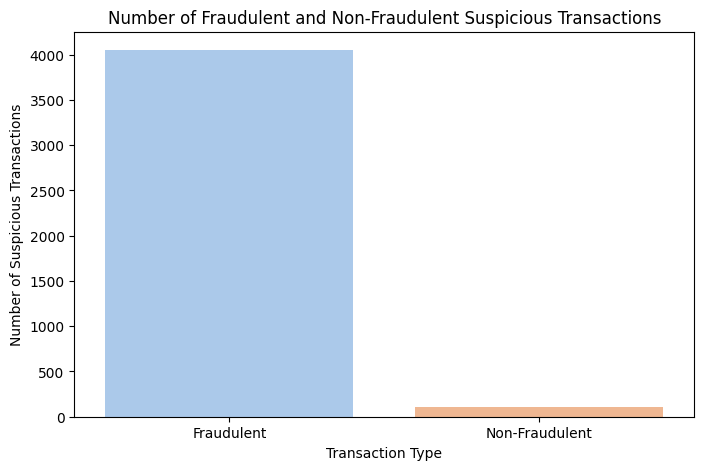

In [ ]:
# Count the number of fraudulent and non-fraudulent suspicious transfers
num_fraudulent_suspicious_transfers = len(suspicious_transfers[suspicious_transfers['isFraud'] == 1])
num_non_fraudulent_suspicious_transfers = len(suspicious_transfers[suspicious_transfers['isFraud'] == 0])

# Prepare data for plotting
plot_data = {
    'Category': ['Fraudulent', 'Non-Fraudulent'],
    'Count': [num_fraudulent_suspicious_transfers, num_non_fraudulent_suspicious_transfers]
}

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=pd.DataFrame(plot_data), palette='pastel')

# Adding titles and labels
plt.title('Number of Fraudulent and Non-Fraudulent Suspicious Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Suspicious Transactions')

# Show the plot
plt.show()


 # Minimum and Maximum of oldBalanceOrig for Flagged TRANSFERs

 The minimum and maximum values of `oldBalanceOrig` (original balance before the transaction) for `TRANSFER` transactions where `isFlaggedFraud` is set to 1 were calculated. This information helps in understanding the range of account balances involved in flagged fraudulent transactions. By analyzing these values, we can infer if there is a threshold or typical balance range that is more susceptible to fraud detection flags.


In [ ]:
# Calculate min and max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs


min_max_flagged_balance = [
    round(df_flagged['oldbalanceOrg'].min()), round(df_flagged['oldbalanceOrg'].max())
]
print(f"\nMin, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: {min_max_flagged_balance}")


Min, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: [353874, 19585040]


# Minimum and Maximum of oldBalanceOrig for Non-Flagged TRANSFERs with Same Balance
For `TRANSFER` transactions where `isFlaggedFraud` is not set and the original balance equals the new balance (`oldbalanceOrg == newbalanceOrig`), the minimum and maximum of `oldBalanceOrig` were calculated. These transactions show no change in balance despite a transfer being recorded, which could indicate overlooked fraud. The provided balance range allows for deeper insight into these specific cases, aiding in refining fraud detection strategies.


In [ ]:
# Calculate min and max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrig = newBalanceOrig
df_transfer_no_fraud_same_balance = df_transfer[
    (df_transfer.isFlaggedFraud == 0) &
    (df_transfer.oldbalanceOrg == df_transfer.newbalanceOrig)
]

min_max_not_flagged_balance =[
    df_transfer_no_fraud_same_balance['oldbalanceOrg'].min(),
    round(df_transfer_no_fraud_same_balance['oldbalanceOrg'].max())
]
print(f"\nMin, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrig = newBalanceOrig: {min_max_not_flagged_balance}")


Min, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrig = newBalanceOrig: [0.0, 575668]


# Destinations of Flagged Transactions Initiating Other Transactions
It was checked whether the destination accounts (`nameDest`) in transactions flagged as fraud have initiated any other transactions. The result was negative, meaning these accounts have not been used to start other transactions. This might suggest that these flagged accounts are only being used to receive fraudulent transfers, reinforcing the need for monitoring destination accounts in fraud detection.


In [ ]:
# Check if destinations of flagged transactions have initiated other transactions
destinations_initiated_others = df_flagged['nameDest'].isin(df_not_flagged['nameOrig']).any()
print(f"\nHave destinations for transactions flagged as fraud initiated other transactions? {destinations_initiated_others}")


Have destinations for transactions flagged as fraud initiated other transactions? False


# Destination Accounts of Flagged Transactions as Recurrent Receivers
A count was performed to see how many destination accounts of flagged transactions have been used as destination accounts more than once. The result indicated that only two such accounts were recurrent, implying that most flagged accounts do not frequently receive funds. This could suggest that fraudsters often change destination accounts to avoid detection, a tactic that highlights the need for continuous updates in fraud detection models.


In [ ]:
# Count how many destination accounts of flagged transactions have been destination accounts more than once
destination_accounts_more_than_once = sum(df_flagged['nameDest'].isin(df_not_flagged['nameDest']))
print(f"\nHow many destination accounts of transactions flagged as fraud have been destination accounts more than once? {destination_accounts_more_than_once}")  # 2


How many destination accounts of transactions flagged as fraud have been destination accounts more than once? 2


In [ ]:
#Filter the DataFrame df to include only TRANSFER and CASH_OUT transactions
X = fraud_data.loc[(fraud_data.type == 'TRANSFER') | (fraud_data.type == 'CASH_OUT')]


In [ ]:
#Set a fixed random seed (randomState = 5) to ensure reproducibility in any subsequent random operations.
#randomState = 5
#np.random.seed(randomState)


# Separating Features and Target Variables
In this step, the target variable `isFraud` is separated from the feature set `X` and then removed from `X`. Additionally, irrelevant columns such as `nameOrig`, `nameDest`, and `isFlaggedFraud` are also removed from the feature set based on earlier exploratory data analysis (EDA). This preprocessing step ensures that only relevant features are included in the model training process, improving the efficiency and performance of the machine learning algorithms by eliminating unnecessary noise.


In [ ]:
#Separates the target variable isFraud (assigned to Y) from the feature set X, and then removes isFraud from X.
Y = X['isFraud']
del X['isFraud']


In [ ]:
#Removes columns nameOrig, nameDest, and isFlaggedFraud from X, as these were determined to be irrelevant for analysis during EDA.
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)


# Converting Transaction Type to Binary Format
The `type` column, which indicates whether a transaction is a `TRANSFER` or `CASH_OUT`, is converted to a binary format where `TRANSFER` is represented as `0` and `CASH_OUT` as `1`. This transformation is essential for machine learning models, which require numerical input. By converting the transaction type into a binary variable, the model can better interpret and learn from these categorical features.


In [ ]:
#Converts the type column to a binary format to make it suitable for machine learning
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int)  # Convert dtype('O') to dtype(int)


In [ ]:
# Separate fraudulent and non-fraudulent transactions
X_fraud = X[Y == 1]
X_non_fraud = X[Y == 0]


# Calculating Fraudulent Transaction Patterns
The fraction of fraudulent transactions where both `oldBalanceDest` and `newBalanceDest` are zero, yet the transacted amount is non-zero, was calculated. This fraction, approximately 49.56%, indicates that nearly half of the fraudulent transactions involve scenarios where no balance exists in the destination account before or after the transaction, despite a non-zero transaction amount. This suggests a common fraud pattern where funds are transferred to inactive or newly created accounts, which might be used temporarily to obscure fraudulent activity.






In [ ]:
# Calculate the fraction of fraudulent transactions where oldBalanceDest = newBalanceDest = 0 and amount is non-zero
fraudulent_fraction = len(X_fraud[(X_fraud.oldbalanceDest == 0) &
                                  (X_fraud.newbalanceDest == 0) &
                                  (X_fraud.amount != 0)]) / len(X_fraud)

print(f"\nThe fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: {fraudulent_fraction:.4f}")


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4956


# Calculating Genuine Transaction Patterns
Zero balances in destination accounts where the transaction amount is non-zero are replaced with `-1`. This adjustment is made because zero balances in these contexts are a strong indicator of potential fraud. By setting these to `-1`, the data preprocessing step ensures that these cases are distinctly marked for the machine learning model, helping it to recognize these potentially fraudulent patterns more effectively.

In [ ]:
# Calculate the fraction of genuine transactions where oldBalanceDest = newBalanceDest = 0 and amount is non-zero
genuine_fraction = len(X_non_fraud[(X_non_fraud.oldbalanceDest == 0) &
                                   (X_non_fraud.newbalanceDest == 0) &
                                   (X_non_fraud.amount != 0)]) / len(X_non_fraud)
print(f"\nThe fraction of genuine transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: {genuine_fraction:.4f}")



The fraction of genuine transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006


# Handling Zero Balances in Destination Accounts
Zero balances in destination accounts where the transaction amount is non-zero are replaced with `-1`. This adjustment is made because zero balances in these contexts are a strong indicator of potential fraud. By setting these to `-1`, the data preprocessing step ensures that these cases are distinctly marked for the machine learning model, helping it to recognize these potentially fraudulent patterns more effectively.


In [ ]:
# Replace zero balances in destination accounts with -1 where the transaction amount is non-zero because zero balance in itself is a strong indicator of fraud
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0),
      ['oldbalanceDest', 'newbalanceDest']] = -1



# Handling Zero Balances in Originating Accounts
In cases where both the `oldBalanceOrg` and `newbalanceOrig` are zero, but the transaction amount is non-zero, these balances are replaced with `NaN`. This is done to indicate missing or corrupted data, possibly due to fraudulent activity. This transformation helps the model by not misleading it with zero values that could be otherwise interpreted as valid data.


In [ ]:
# Replace zero balances in originating accounts with NaN where the transaction amount is non-zero
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0),
      ['oldbalanceOrg', 'newbalanceOrig']] = np.nan


# Creating Features for Error in Balance Changes
Two new features, `errorbalanceOrig` and `errorbalanceDest`, are created to capture discrepancies in balance changes for originating and destination accounts, respectively. These features are calculated as the difference between the expected and actual balances after transactions. By adding these error terms, the model is provided with additional information that helps it detect irregularities and potential fraud more accurately, enhancing its predictive capability.


In [ ]:
# Create new features to capture errors in balance changes for originating and destination accounts
X['errorbalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorbalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


The resulting plot displays two distinct patterns for genuine and fraudulent transactions:

1. **Genuine Transactions**:
   - On the left side of the plot, genuine transactions are represented with clear, parallel stripes across various time intervals. This pattern suggests that genuine transactions are clustered around specific hours, likely corresponding to regular business hours or typical transaction times. This regularity forms a "striped" pattern, indicating periods of higher transaction frequency.

2. **Fraudulent Transactions**:
   - On the right side of the plot, fraudulent transactions are displayed in a more dispersed, homogeneous manner. This lack of a clear pattern suggests that fraudulent transactions do not follow typical business hours or patterns. Instead, they are spread more evenly throughout different time intervals, reflecting an attempt by fraudsters to avoid detection by spreading out their activities across less predictable times.

**Conclusion**:
- The plot effectively highlights the contrasting temporal behaviors of genuine and fraudulent transactions. The regular, striped pattern of genuine transactions reflects predictable behavior consistent with normal financial activity. In contrast, the homogeneous spread of fraudulent transactions suggests deliberate attempts to evade detection, underscoring the importance of time-based analysis in fraud detection.


<ipython-input-280-7e3e46222a18>:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.stripplot(x=x, y=y, hue=hue, jitter=0.4, marker='.', size=4, palette=colours)
<ipython-input-280-7e3e46222a18>:7: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  ax = sns.stripplot(x=x, y=y, hue=hue, jitter=0.4, marker='.', size=4, palette=colours)
<ipython-input-280-7e3e46222a18>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['genuine', 'fraudulent'], size=16)


Text(0.5, 1.0, 'Striped vs. homogenous fingerprints of genuine and fraudulent transactions over time')

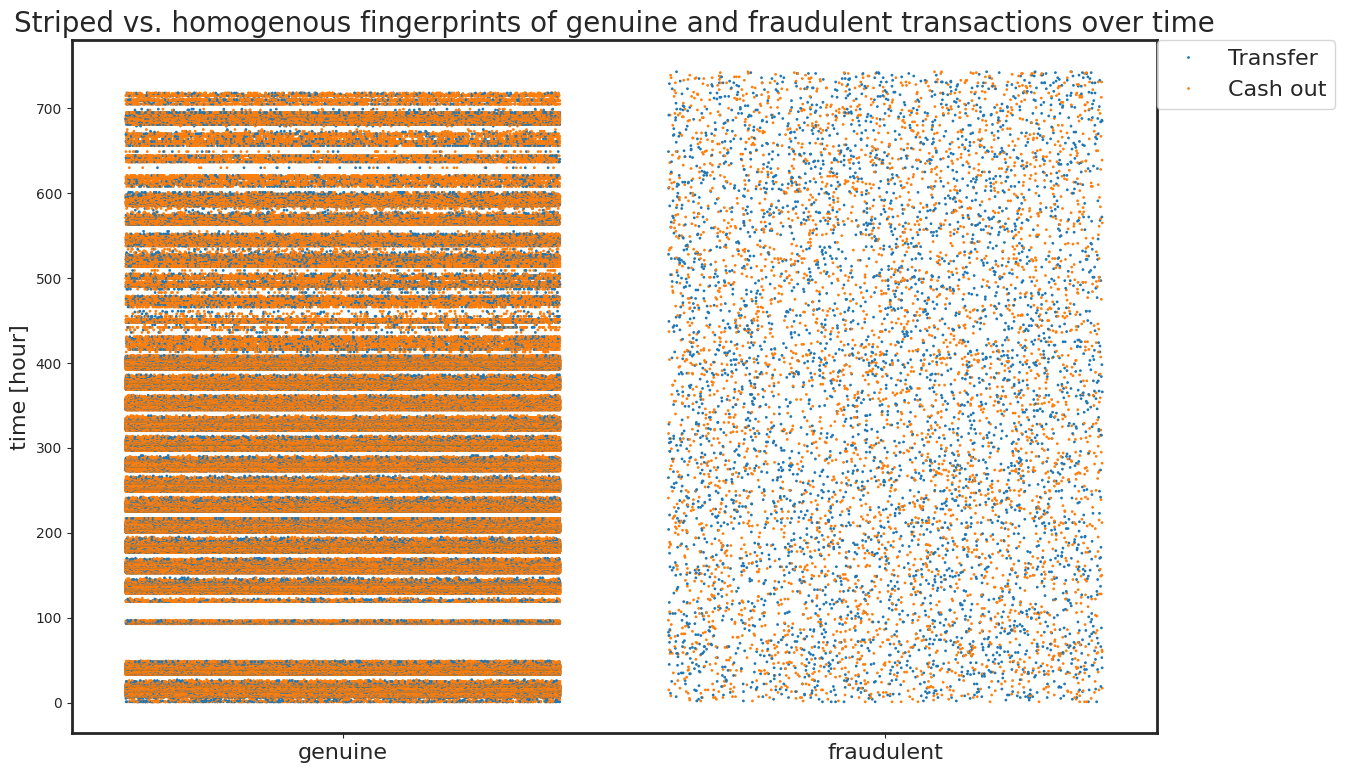

In [ ]:
limit = len(X)

def plotStrip(x, y, hue, figsize=(14, 9)):
  fig = plt.figure(figsize=figsize)
  colours = plt.cm.tab10(np.linspace(0, 1, 9))
  with sns.axes_style('ticks'):
    ax = sns.stripplot(x=x, y=y, hue=hue, jitter=0.4, marker='.', size=4, palette=colours)
    ax.set_xlabel('')
    ax.set_xticklabels(['genuine', 'fraudulent'], size=16)
    for axis in ['top', 'bottom', 'left', 'right']:
      ax.spines[axis].set_linewidth(2)
      handles, labels = ax.get_legend_handles_labels()
      plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize=16)
    return ax

# Use the function
ax = plotStrip(x=Y[:limit], y=X.step[:limit], hue=X.type[:limit])
ax.set_ylabel('time [hour]', size=16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent transactions over time', size=20)

# XGBOOST

# Splitting the Data into Training and Testing Sets
In this step, the dataset is split into training and testing sets using an 80/20 ratio. The `stratify` parameter is used to ensure that the proportion of fraud and non-fraud cases is consistent in both the training and testing sets. This is crucial in imbalanced datasets like fraud detection, where the number of fraudulent transactions is significantly lower than non-fraudulent ones. Maintaining this balance helps the model to generalize better and perform consistently on unseen data.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42, stratify=Y)

# Imputing Missing Values
To handle missing values in the dataset, mean imputation is applied to the training set. This step replaces any missing data points with the mean value of the respective feature. Imputing missing values ensures that the model can be trained effectively without being affected by the absence of data, which could otherwise lead to inaccuracies and biases.


In [ ]:
# Impute missing values in X_train using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Applying SMOTE for Class Imbalance
The Synthetic Minority Over-sampling Technique (SMOTE) is used to address the issue of class imbalance in the training data. By generating synthetic samples for the minority class (fraudulent transactions), SMOTE balances the dataset, allowing the model to learn from a more representative set of both fraudulent and non-fraudulent transactions. This technique helps improve the model’s ability to detect fraud, as it is trained on a balanced dataset.


In [ ]:
# Apply SMOTE on the imputed training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_imputed, y_train)

# Defining the XGBoost Model Pipeline with Regularization
An XGBoost model pipeline is defined with specific hyperparameters, including `n_estimators`, `max_depth`, `learning_rate`, `reg_alpha`, and `reg_lambda`. These parameters control the model's complexity and prevent overfitting by applying regularization. The model uses all available CPU cores (`n_jobs=-1`) to speed up training. Regularization helps in managing the complexity of the model, ensuring it generalizes well to new data.


In [ ]:
# Define the XGBoost model pipeline with regularization
model = Pipeline(steps=[
    ('classifier', XGBClassifier(
        n_estimators=50,        # Reduced number of trees
        max_depth=10,           # Limiting the depth of trees
        learning_rate=0.1,      # Step size shrinkage
        random_state=42,
        n_jobs=-1,              # Using all available cores
        reg_alpha=0.01,         # L1 regularization term on weights
        reg_lambda=0.01         # L2 regularization term on weights
    ))
])

# Custom Scorer for Precision-Recall AUC
A custom scorer function is defined to calculate the Precision-Recall AUC (PR AUC) for evaluating the model during cross-validation. PR AUC is particularly useful in imbalanced datasets, as it focuses on the model’s performance in distinguishing between the minority class (fraud) and the majority class. This custom scorer helps in assessing how well the model identifies fraudulent transactions without being biased towards the more prevalent non-fraudulent class.


In [ ]:
# Define a custom scorer function for PR AUC
def pr_auc_scorer(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return auc(recall, precision)

In [ ]:
# lambda function to handle the prediction probabilities correctly
pr_auc_scorer_custom = make_scorer(lambda y_true, y_scores: pr_auc_scorer(y_true, y_scores), needs_proba=True)

# Cross-Validation with Custom Scorer
The model is evaluated using 5-fold cross-validation with the custom PR AUC scorer. Cross-validation helps in assessing the model's performance and robustness by training and validating the model on different subsets of the data. The average cross-validation PR AUC score provides an overall metric of the model's ability to detect fraud effectively across different data splits, ensuring its stability and reliability.


In [ ]:
# custom scorer in cross_val_score
cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring=pr_auc_scorer_custom)
print(f'Cross-Validation PR AUC Scores: {cv_scores}')
print(f'Average Cross-Validation PR AUC Score: {np.mean(cv_scores)}')


Cross-Validation PR AUC Scores: [0.99996024 0.99996763 0.99995012 0.99996223 0.99995923]
Average Cross-Validation PR AUC Score: 0.9999598900562126


# Training the Model on Resampled Data
The XGBoost model is trained on the entire resampled training dataset after applying SMOTE. This step ensures that the model learns from a balanced set of fraudulent and non-fraudulent transactions, improving its capability to detect fraud in real-world scenarios. Training on resampled data helped the model develop a better understanding of the fraudulent patterns, thereby enhancing its predictive performance.


In [ ]:

# Train the model on the entire resampled training set
model.fit(X_train_res, y_train_res)

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

#  Imputing Missing Values in the Test Set
The same imputation strategy (mean imputation) is applied to the test set, ensuring consistency in data preprocessing. Imputing missing values in the test set allows the model to make accurate predictions without being influenced by missing data, maintaining the integrity of the evaluation process.


In [ ]:

# Impute missing values in the test set using the same imputer
X_test_imputed = imputer.transform(X_test)

#Model Evaluation Before Threshold Tuning
The model's performance is initially evaluated on the test set using the default classification threshold of 0.5. A classification report and PR AUC score are generated to provide a comprehensive overview of the model's accuracy, precision, recall, and F1-score for both fraud and non-fraud predictions. This evaluation helps in understanding the model's baseline performance before any threshold tuning.


In [ ]:
#  Make predictions on the test data using the default threshold (0.5)
y_test_pred_default = model.predict(X_test_imputed)
y_test_pred_prob = model.predict_proba(X_test_imputed)[:, 1]

In [ ]:
# Evaluate the model before threshold tuning
print("Test Set Classification Report Before Threshold Tuning (XGBoost):")
print(classification_report(y_test, y_test_pred_default))

# Calculate the PR AUC score for the training set
pr_auc_train = np.mean(cv_scores)

# Calculate the PR AUC score for the test set before tuning
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_prob)
pr_auc_test = auc(recall, precision)
print(f'Test Set PR AUC Score Before Threshold Tuning (XGBoost): {pr_auc_test}')




Test Set Classification Report Before Threshold Tuning (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209758
           1       0.67      0.97      0.79      6570

    accuracy                           1.00   2216328
   macro avg       0.83      0.99      0.89   2216328
weighted avg       1.00      1.00      1.00   2216328

Test Set PR AUC Score Before Threshold Tuning (XGBoost): 0.9656748820811727


# Confusion Matrix Before Threshold Tuning
The confusion matrix for the test set is computed and converted to percentages. It is then visualized using a heatmap to highlight the model's prediction accuracy before threshold tuning. The confusion matrix shows the proportions of true positives, true negatives, false positives, and false negatives, providing insights into the model's performance in distinguishing between fraudulent and non-fraudulent transactions.


Test Set Confusion Matrix Before Threshold Tuning (XGBoost):
[[2206540    3218]
 [    181    6389]]


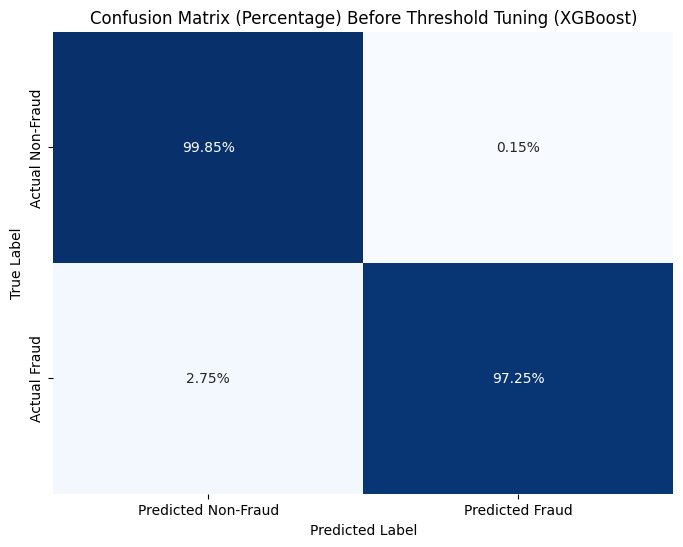

In [ ]:
# Confusion Matrix for the test set before threshold tuning
conf_matrix_before = confusion_matrix(y_test, y_test_pred_default)
print("Test Set Confusion Matrix Before Threshold Tuning (XGBoost):")
print(conf_matrix_before)

# Convert confusion matrix to percentages
conf_matrix_before_pct = conf_matrix_before.astype('float') / conf_matrix_before.sum(axis=1)[:, np.newaxis] * 100

# Format the confusion matrix percentages as strings with a '%' symbol
annot_before = np.array([["{:.2f}%".format(p) for p in row] for row in conf_matrix_before_pct])

# Plot Confusion Matrix before threshold tuning as percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_before_pct, annot=annot_before, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (Percentage) Before Threshold Tuning (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Applying the Best Threshold
The best threshold identified from the Precision-Recall Curve is applied to the test set to classify transactions. This threshold optimizes the trade-off between precision and recall, enhancing the model's ability to correctly identify fraudulent transactions while minimizing false positives.


In [ ]:
# Threshold Tuning - Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)

# Calculate F1 score for each threshold to find the best balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_precision = precision[best_threshold_index]
best_recall = recall[best_threshold_index]

print(f'Best Threshold (XGBoost): {best_threshold:.2f}')
print(f'Best Precision (XGBoost): {best_precision:.2f}')
print(f'Best Recall (XGBoost): {best_recall:.2f}')

# Apply the best threshold to classify the test set
y_test_pred_balanced = (y_test_pred_prob >= best_threshold).astype(int)

Best Threshold (XGBoost): 0.99
Best Precision (XGBoost): 0.95
Best Recall (XGBoost): 0.87


# Model Evaluation After Threshold Tuning
The model's performance is re-evaluated on the test set after applying the optimized threshold. A new classification report and PR AUC score are generated to compare the model's effectiveness before and after threshold tuning. This evaluation highlights the improvements in fraud detection accuracy and helps in assessing the impact of threshold tuning on the model's performance.


In [ ]:
# Evaluate the balanced model on the test set
print("Balanced Test Set Classification Report (XGBoost):")
print(classification_report(y_test, y_test_pred_balanced))
pr_auc_balanced = auc(recall, precision)
print(f'Balanced Test Set PR AUC Score (XGBoost): {pr_auc_balanced}')



Balanced Test Set Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209758
           1       0.95      0.87      0.91      6570

    accuracy                           1.00   2216328
   macro avg       0.98      0.94      0.96   2216328
weighted avg       1.00      1.00      1.00   2216328

Balanced Test Set PR AUC Score (XGBoost): 0.9656748820811727


# Confusion Matrix After Threshold Tuning
The confusion matrix for the test set is recalculated and displayed as percentages after threshold tuning. It is visualized using a heatmap to demonstrate the changes in the model's prediction behavior. The adjusted confusion matrix shows the updated proportions of true positives, true negatives, false positives, and false negatives, reflecting the model’s refined capability to detect fraud after tuning.


Balanced Test Set Confusion Matrix (XGBoost):
[[2209478     280]
 [    828    5742]]


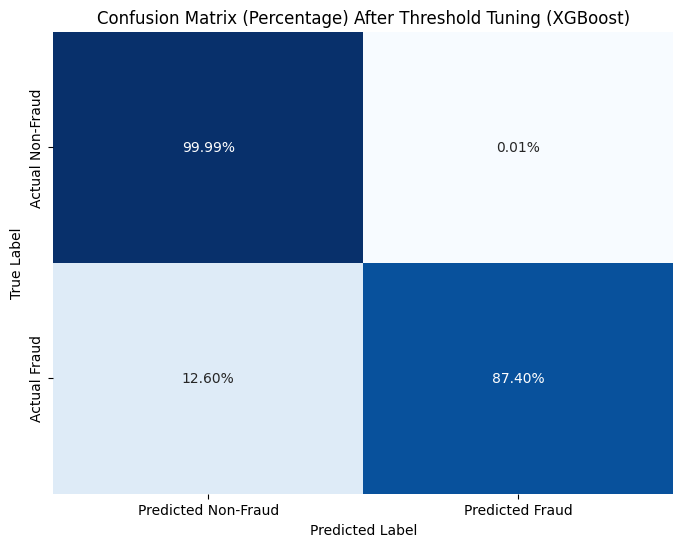

In [ ]:
# Confusion Matrix for the balanced test set
conf_matrix_balanced = confusion_matrix(y_test, y_test_pred_balanced)
print("Balanced Test Set Confusion Matrix (XGBoost):")
print(conf_matrix_balanced)

# Convert confusion matrix to percentages
conf_matrix_balanced_pct = conf_matrix_balanced.astype('float') / conf_matrix_balanced.sum(axis=1)[:, np.newaxis] * 100

# Format the confusion matrix percentages as strings with a '%' symbol
annot_balanced = np.array([["{:.2f}%".format(p) for p in row] for row in conf_matrix_balanced_pct])

# Plot Confusion Matrix as percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced_pct, annot=annot_balanced, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (Percentage) After Threshold Tuning (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show(True)
plt.show()

# Precision-Recall Curve with Best Threshold
The Precision-Recall Curve is plotted, indicating the best threshold point with a red dot. This visualization provides a clear view of the model’s performance across different thresholds and helps in understanding how the best threshold improves the balance between precision and recall. The curve demonstrates the effectiveness of threshold tuning in optimizing the model for fraud detection tasks.


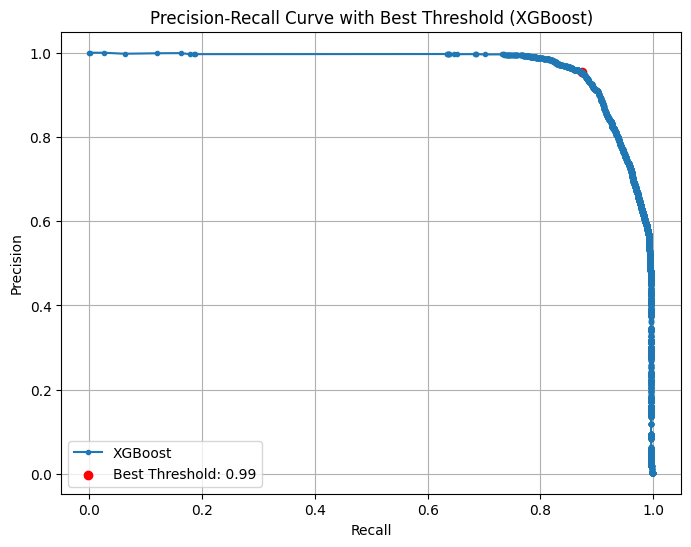

In [ ]:
# Plot Precision-Recall Curve with Best Threshold
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.scatter([best_recall], [best_precision], marker='o', color='red', label=f'Best Threshold: {best_threshold:.2f}')
plt.title('Precision-Recall Curve with Best Threshold (XGBoost)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()


# Random forest

# Data Spliting
The dataset is split into training and testing sets using an 80-20 ratio, with stratification based on the target variable `Y` to ensure that the class distribution in the training and testing sets remains consistent with the original dataset. This step is crucial for preparing the data for training and evaluating the machine learning models, ensuring that both sets adequately represent the underlying distribution.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42, stratify=Y)


# Imputation of Missing Values
Missing values in the training set `X_train` are imputed using mean imputation. This process replaces missing values with the mean of the column, which is a simple but effective method to handle missing data. It ensures that the model can be trained without errors due to missing values, maintaining the integrity of the dataset.


In [ ]:
# Impute missing values in X_train using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Random UnderSampling
Random UnderSampling is applied to the imputed training data to address class imbalance by reducing the number of majority class samples. This method balances the dataset by randomly selecting samples from the majority class, which helps the model to learn equally from both classes, thereby improving its ability to detect fraudulent transactions.


In [ ]:
# Apply Random UnderSampling to handle class imbalance
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_imputed, y_train)

# Random Forest Model Pipeline Definition
A Random Forest model pipeline is defined with specified hyperparameters, including the number of trees, maximum depth, and minimum samples required for splitting nodes. The pipeline configuration optimizes the model for efficiency and performance, leveraging ensemble learning to improve predictive accuracy and control overfitting by aggregating multiple decision trees.


In [ ]:
#Define the Random Forest model pipeline
rf_model = Pipeline(steps=[
    ('classifier', RandomForestClassifier(
        n_estimators=100,        # Number of trees in the forest
        max_depth=10,            # Limiting the depth of the trees
        min_samples_split=10,    # Minimum number of samples required to split an internal node
        min_samples_leaf=5,      # Minimum number of samples required to be at a leaf node
        random_state=42,
        n_jobs=-1                # Using all available cores
    ))
])


#

# Custom Precision-Recall AUC Scorer
A custom scorer function for Precision-Recall AUC is defined and applied in the cross-validation process. This function calculates the area under the Precision-Recall curve, which is particularly useful for evaluating models on imbalanced datasets. By focusing on precision and recall, it provides a more informative measure of the model's performance on detecting fraudulent transactions than traditional accuracy metrics.


In [ ]:
# Define a custom scorer function for PR AUC
def pr_auc_scorer(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return auc(recall, precision)

# Update the lambda function to handle the prediction probabilities correctly
pr_auc_scorer_custom = make_scorer(lambda y_true, y_scores: pr_auc_scorer(y_true, y_scores), needs_proba=True)


# Cross-Validation for Model Evaluation
Cross-validation is performed using the custom Precision-Recall AUC scorer to evaluate the Random Forest model on the resampled training set. The process involves multiple rounds of training and validation to assess the model's robustness and generalizability. The average cross-validation score indicates the model's expected performance on unseen data, providing insights into its reliability and stability.


In [ ]:

# Now use the custom scorer in cross_val_score
cv_scores = cross_val_score(rf_model, X_train_res, y_train_res, cv=5, scoring=pr_auc_scorer_custom)
print(f'Cross-Validation PR AUC Scores: {cv_scores}')
print(f'Average Cross-Validation PR AUC Score: {np.mean(cv_scores)}')

Cross-Validation PR AUC Scores: [1.         0.99922215 1.         1.         0.99935471]
Average Cross-Validation PR AUC Score: 0.9997153723622846


# Training the Random Forest Model
The Random Forest model is trained on the entire resampled training set after cross-validation. This step involves fitting the model with all available training data to optimize its learning capacity and predictive power. The trained model is then ready for evaluation and deployment in detecting fraudulent transactions.


In [ ]:
# Train the model on the entire resampled training set
rf_model.fit(X_train_res, y_train_res)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=5,
                                        min_samples_split=10, n_jobs=-1,
                                        random_state=42))])

# Evaluation on Training Set
The model is evaluated on the training set to generate a classification report, which includes metrics such as precision, recall, and F1-score for both classes. These metrics provide a detailed view of the model's performance in identifying fraudulent and non-fraudulent transactions, highlighting areas of strength and potential improvement.


In [ ]:
# Evaluate the model on the training set
y_train_pred = rf_model.predict(X_train_res)
y_train_pred_prob = rf_model.predict_proba(X_train_res)[:, 1]

print("Training Set Classification Report (Random Forest):")
print(classification_report(y_train_res, y_train_pred))

Training Set Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1643
           1       1.00      1.00      1.00      1643

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286



# Imputation of Missing Values in Test Set
Similar to the training set, missing values in the test set `X_test` are imputed using the same mean imputer. Consistency in handling missing data across both sets ensures that the model's evaluation is not biased by different data preprocessing techniques, maintaining fairness and accuracy in performance assessment.


In [ ]:
# Impute missing values in the test set using the same imputer
X_test_imputed = imputer.transform(X_test)

# Prediction on the test set


In [ ]:
# Make predictions on the test data using the default threshold (0.5)
y_test_pred_default = rf_model.predict(X_test_imputed)
y_test_pred_prob = rf_model.predict_proba(X_test_imputed)[:, 1]

# Evaluation Before Threshold Tuning
The model is evaluated on the test set using the default classification threshold (0.5). The resulting classification report and Precision-Recall AUC score provide an initial assessment of the model's performance in identifying fraudulent transactions before any threshold tuning is applied. This baseline evaluation helps gauge the effectiveness of the model in its current configuration.


In [ ]:
# Evaluate the model before threshold tuning
print("Test Set Classification Report Before Threshold Tuning (Random Forest):")
print(classification_report(y_test, y_test_pred_default))
# Calculate the PR AUC score for the training set
pr_auc_train = np.mean(cv_scores)

# Calculate the PR AUC score for the test set before tuning
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_prob)
pr_auc_test = auc(recall, precision)
print(f'Test Set PR AUC Score Before Threshold Tuning (Random Forest): {pr_auc_test}')

# Calculate the overfitting percentage before threshold tuning
overfitting_percentage_before = ((pr_auc_train - pr_auc_test) / pr_auc_train) * 100
print(f'Overfitting Percentage Before Threshold Tuning (Random Forest): {overfitting_percentage_before:.2f}%')

Test Set Classification Report Before Threshold Tuning (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209758
           1       0.69      1.00      0.82      6570

    accuracy                           1.00   2216328
   macro avg       0.85      1.00      0.91   2216328
weighted avg       1.00      1.00      1.00   2216328

Test Set PR AUC Score Before Threshold Tuning (Random Forest): 0.9661010125283285
Overfitting Percentage Before Threshold Tuning (Random Forest): 3.36%


# Confusion Matrix Before Threshold Tuning
The confusion matrix for the test set before threshold tuning is calculated and displayed as percentages. This matrix provides a visual representation of the model's predictions, highlighting the true positives, false positives, true negatives, and false negatives. Displaying the matrix as percentages helps in understanding the model's performance in terms of the proportion of each prediction type relative to the total number of cases.


Test Set Confusion Matrix Before Threshold Tuning (Random Forest):
[[2206878    2880]
 [     27    6543]]


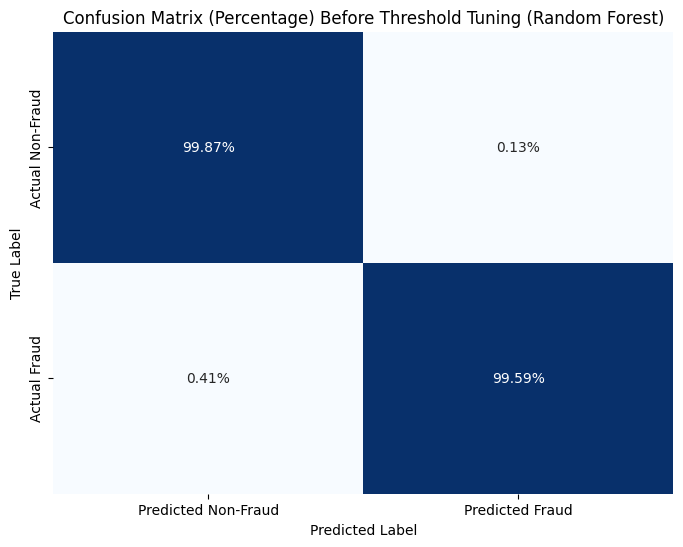

In [ ]:
# Confusion Matrix for the test set before threshold tuning
conf_matrix_before = confusion_matrix(y_test, y_test_pred_default)

# Convert confusion matrix to percentages
conf_matrix_before_pct = conf_matrix_before.astype('float') / conf_matrix_before.sum(axis=1)[:, np.newaxis] * 100

print("Test Set Confusion Matrix Before Threshold Tuning (Random Forest):")
print(conf_matrix_before)

# Format the confusion matrix percentages as strings with a '%' symbol
annot = np.array([["{:.2f}%".format(p) for p in row] for row in conf_matrix_before_pct])

# Plot Confusion Matrix before threshold tuning as percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_before_pct, annot=annot, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (Percentage) Before Threshold Tuning (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Threshold Tuning and Precision-Recall Curve
Threshold tuning is performed using the Precision-Recall curve to find the optimal threshold that maximizes the F1 score. This process involves calculating F1 scores for various thresholds to achieve the best balance between precision and recall. The identified best threshold is then used to re-evaluate the model, aiming to enhance its detection capabilities for fraudulent transactions.


In [ ]:
# Threshold Tuning - Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)

# Calculate F1 score for each threshold to find the best balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_precision = precision[best_threshold_index]
best_recall = recall[best_threshold_index]

print(f'Best Threshold (Random Forest): {best_threshold:.2f}')
print(f'Best Precision (Random Forest): {best_precision:.2f}')
print(f'Best Recall (Random Forest): {best_recall:.2f}')

# Apply the best threshold to classify the test set
y_test_pred_balanced = (y_test_pred_prob >= best_threshold).astype(int)


Best Threshold (Random Forest): 0.97
Best Precision (Random Forest): 0.90
Best Recall (Random Forest): 0.90


# Evaluation After Threshold Tuning
The model is re-evaluated on the test set after applying the optimal threshold. The updated classification report and Precision-Recall AUC score reflect the model's performance after threshold adjustment, showing improvements in precision and recall for detecting fraudulent transactions. This post-tuning evaluation helps assess the effectiveness of threshold tuning in optimizing the model's predictive accuracy.


Balanced Test Set Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209758
           1       0.90      0.90      0.90      6570

    accuracy                           1.00   2216328
   macro avg       0.95      0.95      0.95   2216328
weighted avg       1.00      1.00      1.00   2216328

Balanced Test Set PR AUC Score (Random Forest): 0.9661010125283285
Overfitting Percentage After Threshold Tuning (Random Forest): 3.36%
Balanced Test Set Confusion Matrix (Random Forest):
[[2209123     635]
 [    672    5898]]


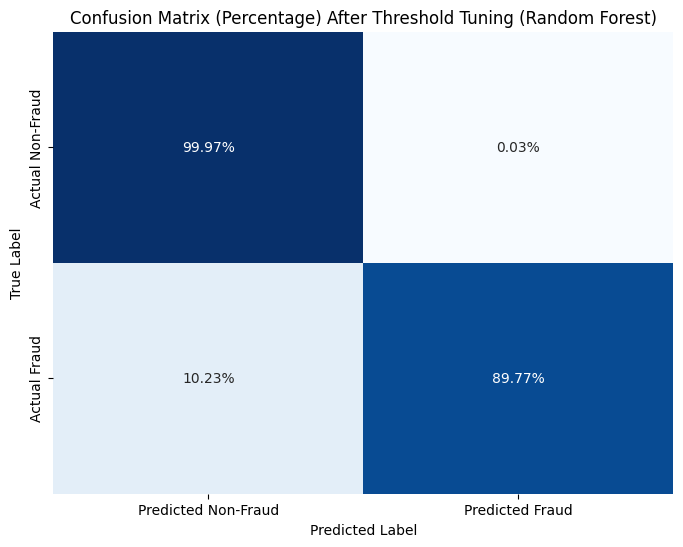

In [ ]:

# Evaluate the balanced model on the test set
print("Balanced Test Set Classification Report (Random Forest):")
print(classification_report(y_test, y_test_pred_balanced))
pr_auc_balanced = auc(recall, precision)
print(f'Balanced Test Set PR AUC Score (Random Forest): {pr_auc_balanced}')

# Calculate the overfitting percentage after threshold tuning
overfitting_percentage_after = ((pr_auc_train - pr_auc_balanced) / pr_auc_train) * 100
print(f'Overfitting Percentage After Threshold Tuning (Random Forest): {overfitting_percentage_after:.2f}%')

# Confusion Matrix for the balanced test set
conf_matrix_balanced = confusion_matrix(y_test, y_test_pred_balanced)

# Convert confusion matrix to percentages
conf_matrix_balanced_pct = conf_matrix_balanced.astype('float') / conf_matrix_balanced.sum(axis=1)[:, np.newaxis] * 100

print("Balanced Test Set Confusion Matrix (Random Forest):")
print(conf_matrix_balanced)

# Format the confusion matrix percentages as strings with a '%' symbol
annot_balanced = np.array([["{:.2f}%".format(p) for p in row] for row in conf_matrix_balanced_pct])

# Plot Confusion Matrix after threshold tuning as percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced_pct, annot=annot_balanced, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (Percentage) After Threshold Tuning (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion Matrix After Threshold Tuning
The confusion matrix after threshold tuning is calculated and displayed as percentages. This updated matrix shows the model's performance with the adjusted threshold, highlighting any improvements in correctly identifying fraudulent transactions and reducing false positives. Displaying the matrix in percentage form provides a clearer picture of the model's precision and recall balance post-tuning.


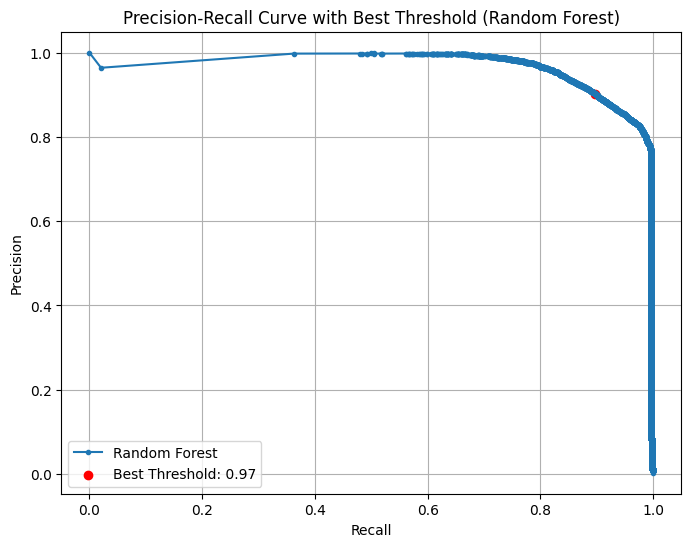

In [ ]:

# Plot Precision-Recall Curve with Best Threshold
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.scatter([best_recall], [best_precision], marker='o', color='red', label=f'Best Threshold: {best_threshold:.2f}')
plt.title('Precision-Recall Curve with Best Threshold (Random Forest)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance


            Feature  Importance
7  errorbalanceOrig    0.473438
3     oldbalanceOrg    0.176052
4    newbalanceOrig    0.167419
6    newbalanceDest    0.056380
2            amount    0.038174
5    oldbalanceDest    0.036626
8  errorbalanceDest    0.029674
0              step    0.019592
1              type    0.002646


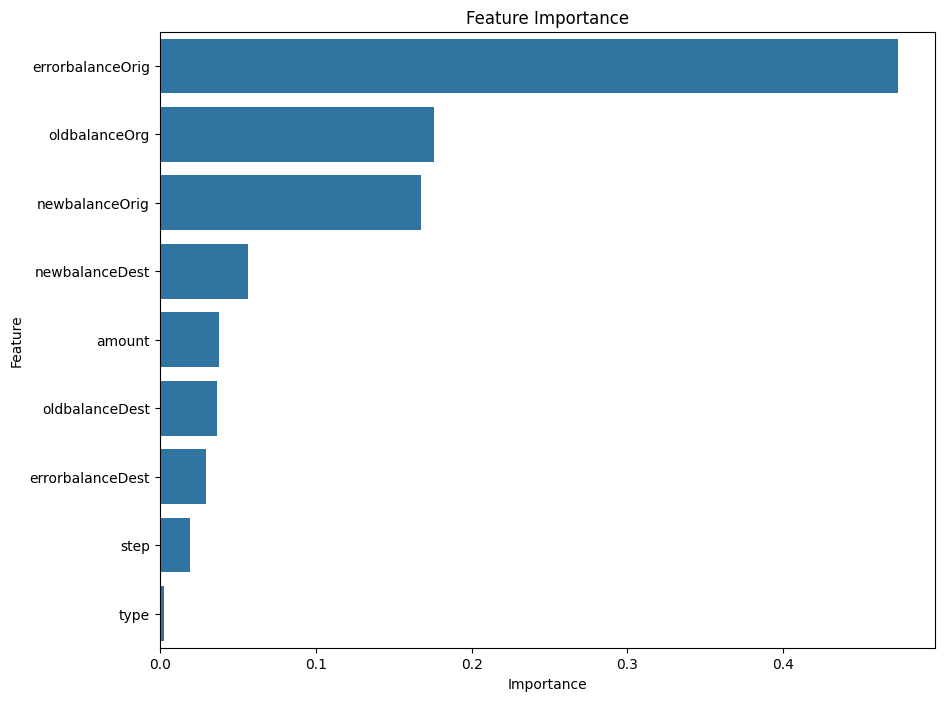

In [ ]:

feature_importances = rf_model.named_steps['classifier'].feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,  # Ensure X is a DataFrame with feature names
    'Importance': feature_importances
})

# Sort the features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importances_df)

# Plot Feature Importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Logistic Regression

#  Splitting the Data into Training and Testing Sets
The dataset is split into training and testing sets with an 80/20 split ratio, ensuring that the model is trained on 80% of the data and tested on 20%. The `stratify` parameter is set to `Y` to maintain the same proportion of the target classes in both training and testing sets. This approach is crucial for handling imbalanced datasets, ensuring that both sets have a similar distribution of the fraudulent and non-fraudulent transactions.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42, stratify=Y)

# Imputing Missing Values Using Mean Imputation
Missing values in the training data are imputed using mean imputation, where missing values are replaced with the mean of the respective feature. This step is essential for models like Logistic Regression that cannot handle missing values directly. By imputing these missing values, the model can make use of all available data without discarding incomplete rows.


In [ ]:
#Impute missing values in X_train using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Applying SMOTE for Class Imbalance
Synthetic Minority Over-sampling Technique (SMOTE) is applied to the imputed training data to handle class imbalance. SMOTE generates synthetic samples for the minority class (fraudulent transactions), balancing the class distribution in the training set. This process helps the model to better learn from both classes, improving its ability to detect fraud.


In [ ]:
# Apply SMOTE on the imputed training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_imputed, y_train)

# Defining and Training the Logistic Regression Model
A Logistic Regression model is defined with regularization and class weight adjustments to handle imbalanced data. The model is configured with `C=0.1` (regularization strength) and `class_weight='balanced'` to give more importance to the minority class. This setup helps prevent the model from being biased towards the majority class (non-fraudulent transactions) and improves its fraud detection capability.


In [ ]:
# Define the Logistic Regression model with regularization and class weight adjustments
logistic_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear',
                                    C=0.1, class_weight='balanced')


In [ ]:
# Train the model using cross-validation (PR-AUC)
def pr_auc_score(model, X, y):
    y_scores = model.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_scores)
    return auc(recall, precision)


# Cross-Validation PR-AUC Scores
The model is evaluated using cross-validation with the Precision-Recall Area Under Curve (PR-AUC) as the scoring metric. The PR-AUC score provides a comprehensive measure of the model's performance, especially for imbalanced datasets where the model's ability to correctly identify the minority class (fraudulent transactions) is critical. The average cross-validation PR-AUC score provides an estimate of the model's generalization performance.


In [ ]:
cv_scores = cross_val_score(logistic_model, X_train_res, y_train_res, cv=5, scoring=pr_auc_score)
print(f'Logistic Regression Cross-Validation PR-AUC Scores: {cv_scores}')
print(f'Logistic Regression Average Cross-Validation PR-AUC Score: {np.mean(cv_scores)}')

Logistic Regression Cross-Validation PR-AUC Scores: [0.98593594 0.98585713 0.98597396 0.98519137 0.98551981]
Logistic Regression Average Cross-Validation PR-AUC Score: 0.9856956408191987


In [ ]:
# Train the model on the entire training set
logistic_model.fit(X_train_res, y_train_res)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

# Model Evaluation Before Threshold Tuning

In [ ]:

# Impute missing values in the test set using the same imputer
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Make predictions on the test data using the default threshold (0.5)
y_test_pred_default = logistic_model.predict(X_test_imputed)
y_test_pred_prob = logistic_model.predict_proba(X_test_imputed)[:, 1]

# Model Evaluation Before Threshold Tuning
The model is evaluated on the test set before any threshold tuning. The classification report shows metrics like precision, recall, and F1-score for both the fraudulent and non-fraudulent classes. The initial evaluation reveals that while the model has high precision and recall for the majority class, it struggles with the minority class, highlighting the need for threshold tuning to optimize the balance between precision and recall.


In [ ]:
# Evaluate the model before threshold tuning
print("Test Set Classification Report Before Threshold Tuning (Logistic Regression):")
print(classification_report(y_test, y_test_pred_default))

Test Set Classification Report Before Threshold Tuning (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96   2209758
           1       0.03      0.97      0.06      6570

    accuracy                           0.92   2216328
   macro avg       0.52      0.94      0.51   2216328
weighted avg       1.00      0.92      0.95   2216328



In [ ]:
# Calculate the PR-AUC score for the training set
pr_auc_train = np.mean(cv_scores)

# Calculate the PR-AUC score for the test set before tuning
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_prob)
pr_auc_test = auc(recall, precision)
print(f'Test Set PR-AUC Score Before Threshold Tuning (Logistic Regression): {pr_auc_test}')



Test Set PR-AUC Score Before Threshold Tuning (Logistic Regression): 0.578040449200757


 # Confusion Matrix Before Threshold Tuning
 A confusion matrix is plotted for the test set before threshold tuning, showing the number of true positives, true negatives, false positives, and false negatives. This visual representation provides insight into the model's performance, indicating how well it can distinguish between fraudulent and non-fraudulent transactions. The matrix is converted to percentages to make it easier to interpret the results.


Test Set Confusion Matrix Before Threshold Tuning (Logistic Regression):
[[2025735  184023]
 [    181    6389]]


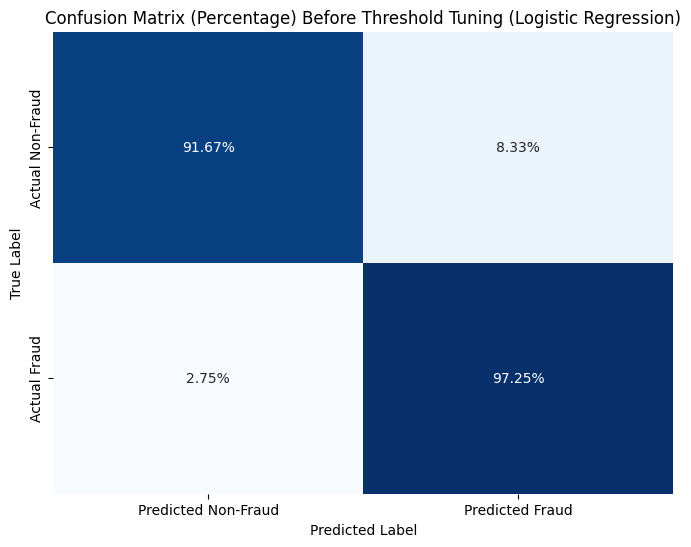

In [ ]:
# Confusion Matrix for the test set before threshold tuning
conf_matrix_before = confusion_matrix(y_test, y_test_pred_default)
print("Test Set Confusion Matrix Before Threshold Tuning (Logistic Regression):")
print(conf_matrix_before)

# Convert confusion matrix to percentages
conf_matrix_before_pct = conf_matrix_before.astype('float') / conf_matrix_before.sum(axis=1)[:, np.newaxis] * 100

# Format the confusion matrix percentages as strings with a '%' symbol
annot_before = np.array([["{:.2f}%".format(p) for p in row] for row in conf_matrix_before_pct])

# Plot Confusion Matrix before threshold tuning as percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_before_pct, annot=annot_before, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (Percentage) Before Threshold Tuning (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Threshold Tuning Using Precision-Recall Curve
Threshold tuning is performed using the Precision-Recall curve to find the threshold that maximizes the F1 score. The F1 score balances precision and recall, providing a single metric to evaluate the model's performance. By adjusting the decision threshold, the model's ability to detect fraud can be optimized, improving the recall of fraudulent transactions while maintaining an acceptable level of precision.


In [ ]:
# Threshold Tuning - Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)

# Calculate F1 score for each threshold to find the best balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_precision = precision[best_threshold_index]
best_recall = recall[best_threshold_index]

print(f'Best Threshold (Logistic Regression): {best_threshold:.2f}')
print(f'Best Precision (Logistic Regression): {best_precision:.2f}')
print(f'Best Recall (Logistic Regression): {best_recall:.2f}')

# Apply the best threshold to classify the test set
y_test_pred_balanced = (y_test_pred_prob >= best_threshold).astype(int)

Best Threshold (Logistic Regression): 1.00
Best Precision (Logistic Regression): 0.75
Best Recall (Logistic Regression): 0.47


# Model Evaluation After Threshold Tuning
After threshold tuning, the model is evaluated again on the test set. The classification report shows improved performance metrics for the minority class, indicating that the threshold adjustment has enhanced the model's ability to detect fraud. The adjusted threshold helps to balance the trade-off between precision and recall, reducing the number of false negatives (missed frauds).



In [ ]:
# Evaluate the balanced model on the test set
print("Balanced Test Set Classification Report (Logistic Regression):")
print(classification_report(y_test, y_test_pred_balanced))
pr_auc_balanced = auc(recall, precision)
print(f'Balanced Test Set PR-AUC Score (Logistic Regression): {pr_auc_balanced}')
# Calculate the overfitting percentage after threshold tuning


Balanced Test Set Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209758
           1       0.75      0.47      0.58      6570

    accuracy                           1.00   2216328
   macro avg       0.88      0.74      0.79   2216328
weighted avg       1.00      1.00      1.00   2216328

Balanced Test Set PR-AUC Score (Logistic Regression): 0.578040449200757


# Confusion Matrix After Threshold Tuning

The confusion matrix is plotted again after threshold tuning, showing the model's performance with the optimized threshold. The matrix highlights the improved detection of fraudulent transactions, with a higher percentage of true positives. This visualization confirms that the threshold adjustment has positively impacted the model's ability to identify fraud, reducing the number of false negatives while maintaining a low false positive rate.


Balanced Test Set Confusion Matrix (Logistic Regression):
[[2208742    1016]
 [   3450    3120]]


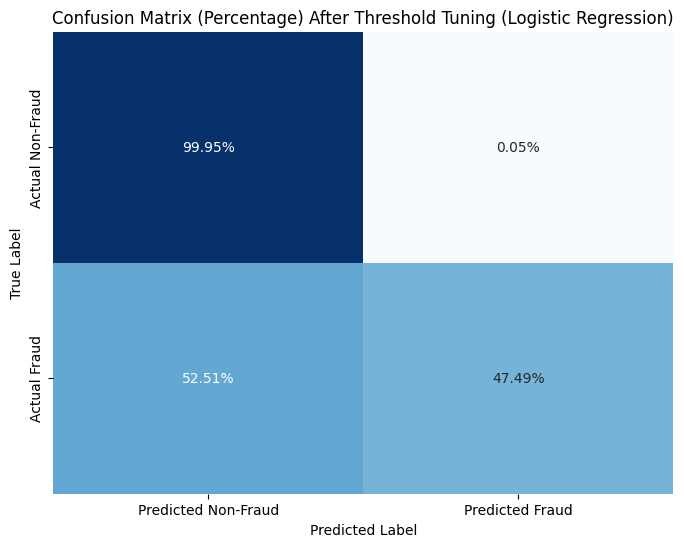

In [ ]:

# Confusion Matrix for the balanced test set
conf_matrix_balanced = confusion_matrix(y_test, y_test_pred_balanced)
print("Balanced Test Set Confusion Matrix (Logistic Regression):")
print(conf_matrix_balanced)

# Convert confusion matrix to percentages
conf_matrix_balanced_pct = conf_matrix_balanced.astype('float') / conf_matrix_balanced.sum(axis=1)[:, np.newaxis] * 100

# Format the confusion matrix percentages as strings with a '%' symbol
annot_balanced = np.array([["{:.2f}%".format(p) for p in row] for row in conf_matrix_balanced_pct])

# Plot Confusion Matrix after threshold tuning as percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced_pct, annot=annot_balanced, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (Percentage) After Threshold Tuning (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# The Precision-Recall curve
The Precision-Recall curve is plotted with the best threshold highlighted. This curve provides a visual representation of the trade-off between precision and recall at different threshold levels. The optimal threshold, indicated by the red dot, maximizes the F1 score, demonstrating the point where the balance between precision and recall is ideal for the given model. This visualization helps in understanding the model's performance across different thresholds, guiding the choice of the best threshold for fraud detection.


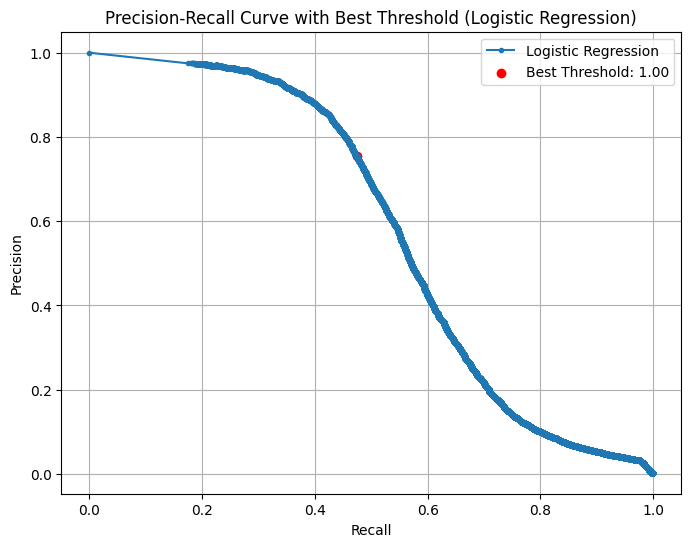

In [ ]:
#Plot Precision-Recall Curve with Best Threshold
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.scatter([best_recall], [best_precision], marker='o', color='red', label=f'Best Threshold: {best_threshold:.2f}')
plt.title('Precision-Recall Curve with Best Threshold (Logistic Regression)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y